In [1]:
##pip install cufflinks plotly  --> run this in Anaconda prompt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master_data=pd.read_csv('C:/Users/ancy7/Documents/Capstone/Data/Master_data.csv')

In [3]:
from datetime import datetime, timedelta 

In [4]:
date0=pd.to_datetime(master_data['Last_Video_Watch_Time'])

In [5]:
date1=pd.to_datetime(master_data['Last_login_DateTime'])

In [6]:
time_diff=date0-date1

In [8]:
master_data.rename(columns={'  ':'Others'},inplace=True)

In [9]:
geo_info_wise_video_demand=master_data[['Country_x',
 'Others',
 ' Action ',
 ' Adventure ',
 ' Animation ',
 ' Anime ',
 ' Athletics ',
 ' Automotive ',
 ' Award Show ',
 ' Badminton ',
 ' Comedy ',
 ' Concerts ',
 ' Cooking ',
 ' Crime ',
 ' Current Affairs / General ',
 ' Documentary ',
 ' Drama ',
 ' Entertainment ',
 ' Entertainment News ',
 ' Equestrian ',
 ' Family ',
 ' Fashion ',
 ' Food ',
 ' Football ',
 ' Game Show ',
 ' General ',
 ' Golf ',
 ' Hockey ',
 ' Horror ',
 ' Horror / Supernatural ',
 ' Martial Sports ',
 ' Motor Sports ',
 ' Music ',
 ' Musical / Opera ',
 ' Mystery ',
 ' Other Sports (General) ',
 ' Others ',
 ' Reality ',
 ' Reality Show ',
 ' Religious ',
 ' Romance ',
 ' Series ',
 ' Special Event ',
 ' Sports Magazine ',
 ' TV Shows (General) ',
 ' Talk Show ',
 ' Team Sports (Excl. Football) ',
 ' Tennis / Squash ',
 ' Thriller ',
 ' Travel ',
 ' Unknown ',
 ' Variety ',
 ' Wrestling ']]

In [10]:
geo_sum=geo_info_wise_video_demand.groupby('Country_x').sum()

In [14]:
geo_sum['Most_watched_genre']=geo_sum.idxmax(axis=1)

In [16]:
list(master_data.columns)

['Unnamed: 0',
 'UserId',
 'Reg_N',
 'Reg_Y',
 'No_Of_Devices_Uninstalled',
 'State_x',
 'Country_x',
 'Last_login_Device',
 'Last_login_OS',
 'Last_login_DateTime',
 'App_Launches',
 'UTMVisited',
 'Others',
 ' Action ',
 ' Adventure ',
 ' Animation ',
 ' Anime ',
 ' Athletics ',
 ' Automotive ',
 ' Award Show ',
 ' Badminton ',
 ' Comedy ',
 ' Concerts ',
 ' Cooking ',
 ' Crime ',
 ' Current Affairs / General ',
 ' Documentary ',
 ' Drama ',
 ' Entertainment ',
 ' Entertainment News ',
 ' Equestrian ',
 ' Family ',
 ' Fashion ',
 ' Food ',
 ' Football ',
 ' Game Show ',
 ' General ',
 ' Golf ',
 ' Hockey ',
 ' Horror ',
 ' Horror / Supernatural ',
 ' Martial Sports ',
 ' Motor Sports ',
 ' Music ',
 ' Musical / Opera ',
 ' Mystery ',
 ' Other Sports (General) ',
 ' Others ',
 ' Reality ',
 ' Reality Show ',
 ' Religious ',
 ' Romance ',
 ' Series ',
 ' Special Event ',
 ' Sports Magazine ',
 ' TV Shows (General) ',
 ' Talk Show ',
 ' Team Sports (Excl. Football) ',
 ' Tennis / Squash

C:\Users\ancy7\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


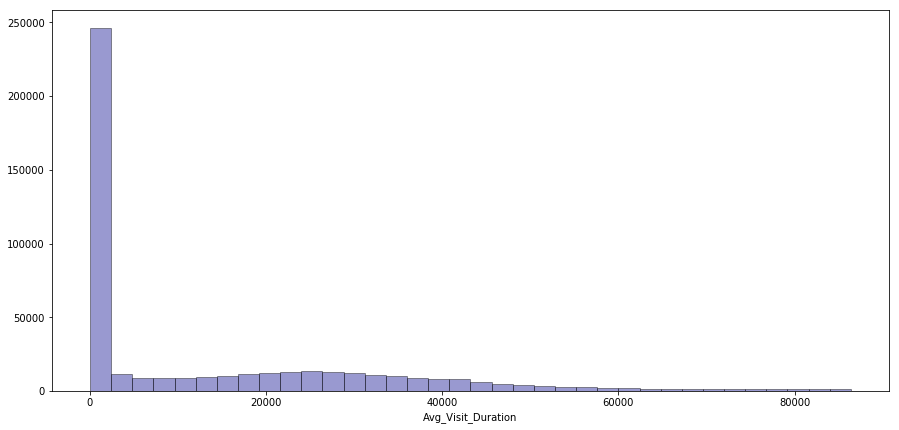

In [19]:
#frequency of using app per user
plt.figure(figsize=(15,7))

sns.distplot(master_data['Avg_Visit_Duration'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [21]:
#Total number of people who used this app?
print('The total number of people who use these app -',master_data['UserId'].nunique())

The total number of people who use these app - 466124


In [22]:
v_start_df=pd.read_csv('C:/Users/ancy7/Documents/Capstone/Data/VideoStarted.csv')

In [23]:
print("Almost %5d videos are watched on this app every single day." % (v_start_df.groupby(['Date']).size().mean()))

Almost 11370 videos are watched on this app every single day.


In [24]:
a_launch_df=pd.read_csv('C:/Users/ancy7/Documents/Capstone/Data/AppLaunched.csv')

In [25]:
print("This apps gets over %5d visitors per day." % (a_launch_df.groupby(['Date']).size().mean()))

This apps gets over 17190 visitors per day.


In [27]:
a_launch_df['Date']=pd.to_datetime(a_launch_df['Date'], format='%Y%m%d', errors='coerce')

Text(0.5,1,'App Launches per User on Monthly Basis')

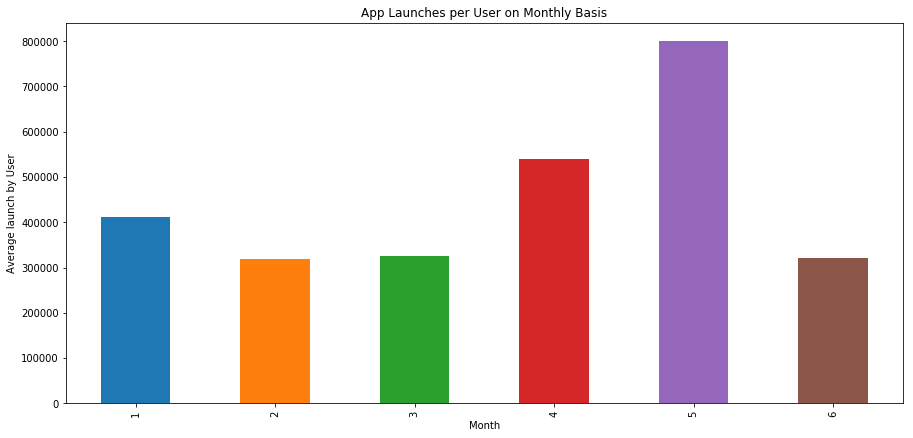

In [28]:
#avg launches per user
plt.figure(figsize=(15,7))
a_launch_df.groupby(a_launch_df['Date'].dt.month).size().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average launch by User')
plt.title('App Launches per User on Monthly Basis')

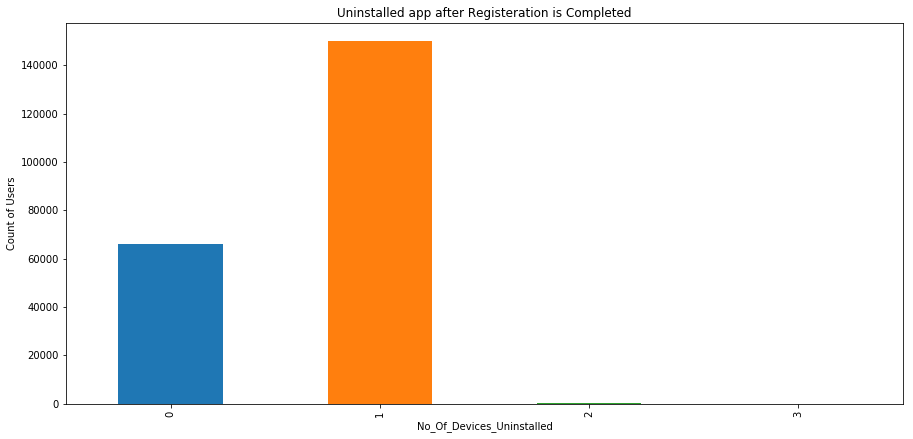

In [29]:
#22. no of uninstalls done from the devices with registeration status of 'complete'?
plt.figure(figsize=(15,7))
a=master_data.groupby(['No_Of_Devices_Uninstalled','Reg_Y'], as_index=False).size().unstack()
a.iloc[:,1].plot(kind='bar')
plt.ylabel('Count of Users')
plt.title('Uninstalled app after Registeration is Completed')
plt.show()

<Figure size 1080x504 with 0 Axes>

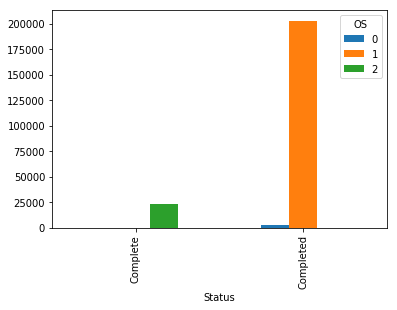

In [30]:
#21.with which kind of 'os' did maximum no of users complete/completed their registration?
plt.figure(figsize=(15,7))
a_reg=pd.read_csv('C:/Users/ancy7/Documents/Capstone/Data/Registration.csv')
b=a_reg.groupby(['Status','OS']).size().unstack()
b.loc[['Complete','Completed'],[0,1,2]].plot(kind='bar')

Text(0.5,1,'Program Type vs Watch Time')

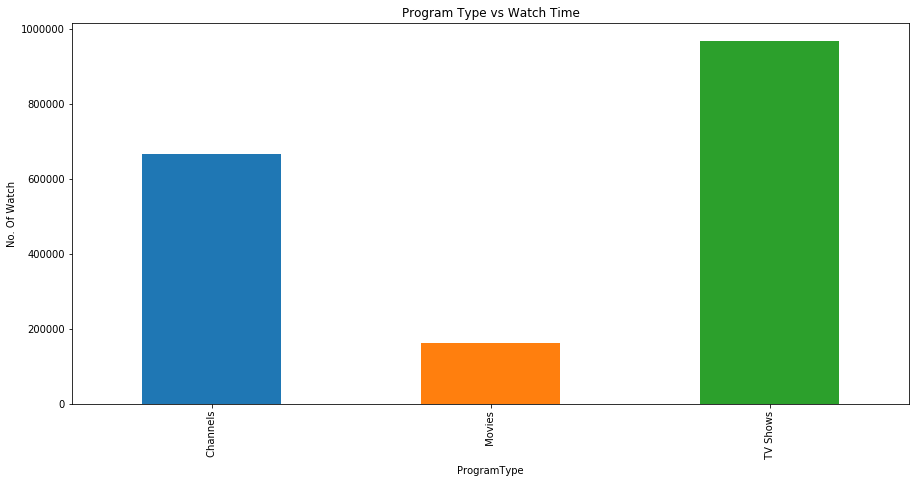

In [31]:
#20. total no of users watch videos of same program type
plt.figure(figsize=(15,7))
v_start_df.groupby('ProgramType')['UserId'].count().plot(kind='bar')
plt.ylabel('No. Of Watch')
plt.title('Program Type vs Watch Time')

In [32]:
#avg no.of users watch videos of same progtype
#channels --- 0.370
#movies ---- 0.090
#Tv shows --- 0.53

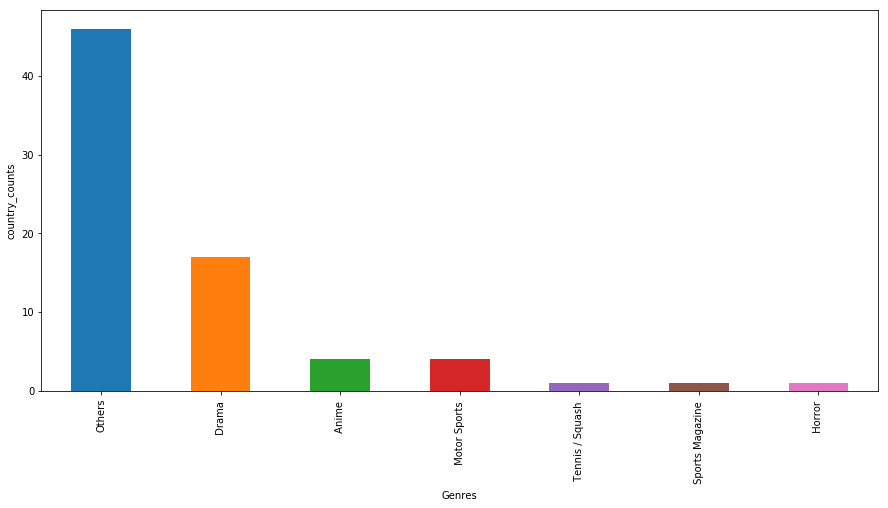

In [33]:
#19. type of genre regularly watched by a particular country
#country wise popular genre
plt.figure(figsize=(15,7))
pd.value_counts(geo_sum['Most_watched_genre']).plot.bar()
plt.xlabel('Genres')
plt.ylabel('country_counts')
plt.show()

In [34]:
#avg dormant time of a user before app is uninstalled
a_uninstall_df=pd.read_csv('C:/Users/ancy7/Documents/Capstone/Data/AppUninstalled.csv')
a_uninstall_df["Date"]=pd.to_datetime(a_uninstall_df.Date,format='%Y%m%d')
master_data['Last_login_DateTime']=pd.to_datetime(master_data.Last_login_DateTime)
s=a_launch_df.merge(a_uninstall_df[['UserId','Date']],how='left',on='UserId')
s['Date_y']=s['Date_y'].fillna(s.Date_y.min())
s['Dormant_days']=(s['Date_y'] - s['Date_x'])
s['Dormant_days']=s['Dormant_days'].dt.days

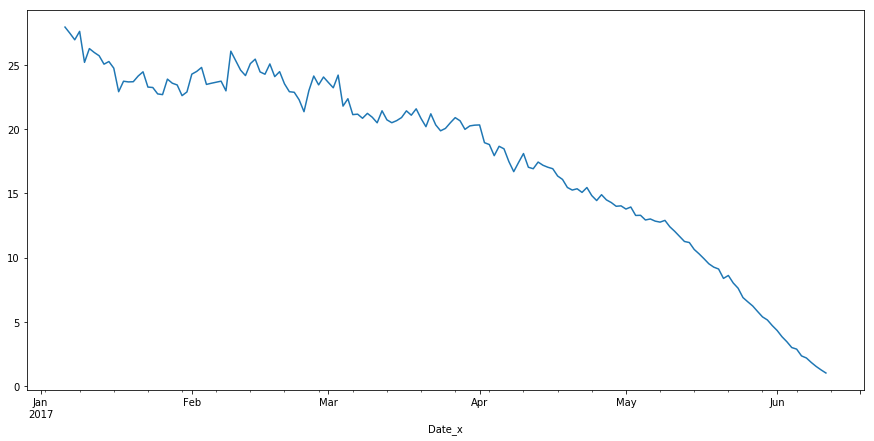

In [35]:
plt.figure(figsize=(15,7))
s[s['Dormant_days']> 0].groupby(['Date_x','UserId', 'Dormant_days'], as_index=False).mean().groupby('Date_x')['Dormant_days'].mean().plot()

<Figure size 1080x504 with 0 Axes>

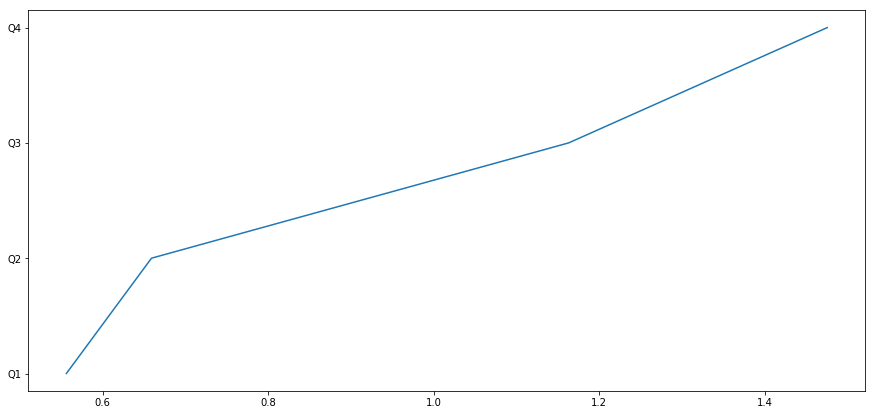

In [36]:
#User behaviour according to the time quarters
plt.figure(figsize=(15,7))
x1=np.array([0.5561417133638259,0.6590091906874566,1.1632484060035526,1.4757789772678516])
xtick=['Q1','Q2','Q3','Q4']
plt.figure(figsize=(15,7))
plt.plot(x1,xtick)
plt.show()

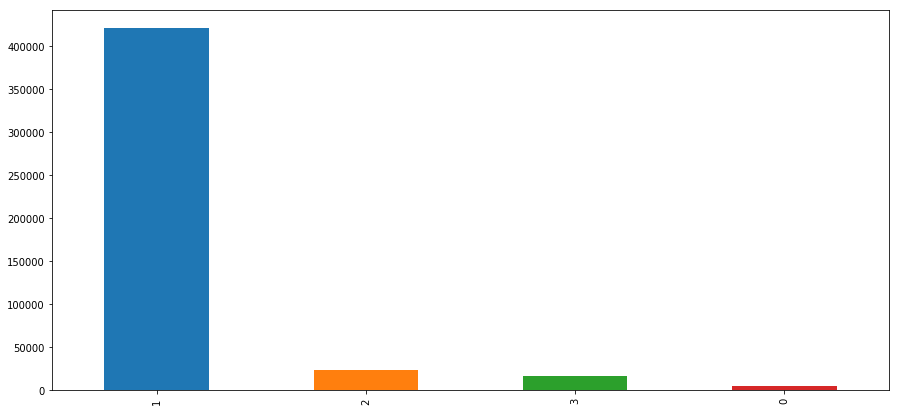

In [37]:
#how many devices user login from?
plt.figure(figsize=(15,7))
master_data.Last_login_Device.value_counts().plot(kind='bar')

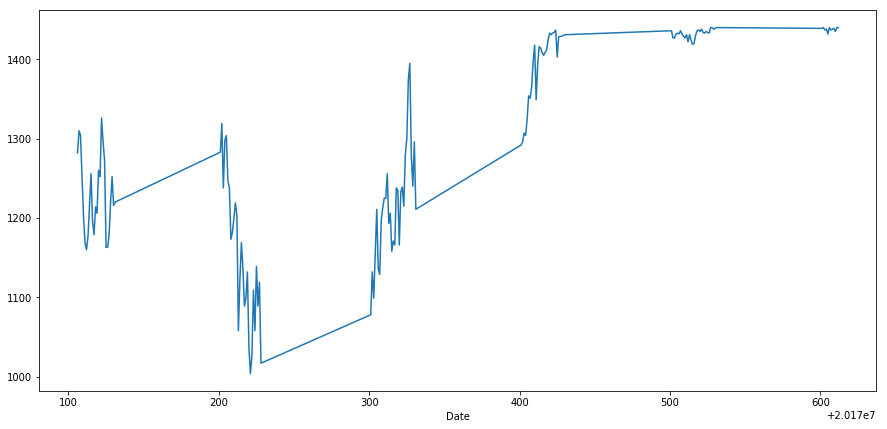

In [38]:
#avg video watch time per user on the app
plt.figure(figsize=(15,7))
v_start_df.groupby(['Date','Minute_Of_Day'], as_index=False).sum().groupby('Date')['Minute_Of_Day'].size().plot()

In [39]:
#how many users uninstalled the app after visiting around 10 ad campaigns?
utm_visited=pd.read_csv('C:/Users/ancy7/Documents/Capstone/Data/UTMVisited.csv')
ad=utm_visited.groupby('UserId').size().reset_index(name='count')
ad_1=pd.DataFrame(ad[ad['count']>10])
a_un=a_uninstall_df.groupby('UserId').size().reset_index(name='count_uninstall')
a_un_1=ad_1.merge(a_un[['UserId','count_uninstall']],on='UserId',how='left').fillna(0)

In [40]:
len(a_un_1[a_un_1['count_uninstall']!=0]['UserId'])

949

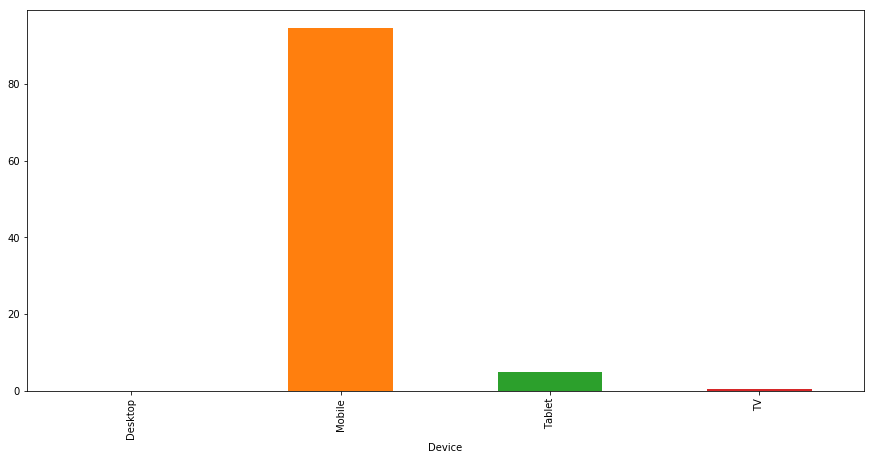

In [42]:
#The percentage of mobile app video views is around 94%
plt.figure(figsize=(15,7))
data = [['Desktop',699],['Mobile',1705054],['Tablet',89849],['TV',9232]]
dev_df = pd.DataFrame(data,columns=['Device','Counts'])
dev_df['Percent']=round((dev_df.Counts*100)/1804834,2)
dev_df.set_index('Device',drop=True,inplace=True)
dev_df.Percent.plot(kind='bar')

In [44]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [45]:
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [46]:
master_data.Country_x.iplot(kind='hist', xTitle='Country',
                  yTitle='Count', title='Number of AppLaunches in Country')

In [47]:
da=master_data
da['Last_Video_Watch_Time']=pd.to_datetime(da['Last_Video_Watch_Time'])

In [48]:
df2 = da[['Last_Video_Watch_Time','Q1','Q2','Q3','Q4']].set_index('Last_Video_Watch_Time').resample('M').mean()

In [49]:
df2.iplot(kind='bar', xTitle='Date', yTitle='Average',
    title='Monthly Average Views and Reads')

In [50]:
#x.drop(columns=['UserId','Last_login_DateTime','Last_Video_Watch_Time'],axis=1,inplace=True)

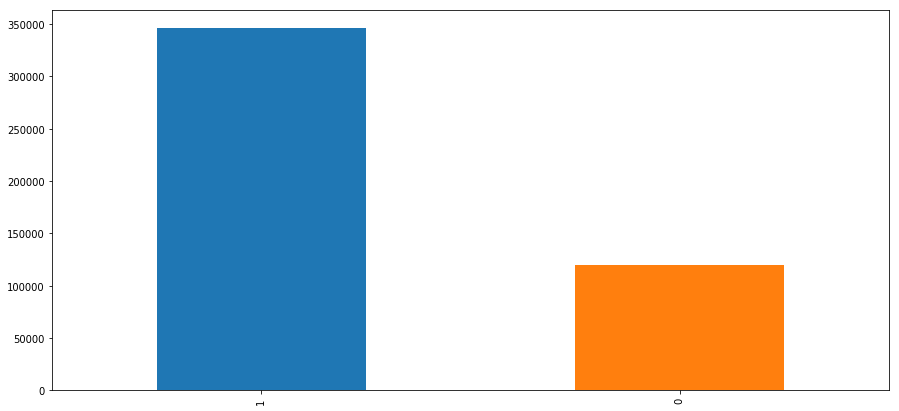

In [51]:
#no of users who are dormant(1) and active(0)
plt.figure(figsize=(15,7))
master_data['Dormant'].value_counts().plot(kind='bar')

In [52]:
hyper_active_user=master_data[(master_data['Total_Videos_Watched']>200) & (master_data['UTMVisited']>10)]

<Figure size 1080x504 with 0 Axes>

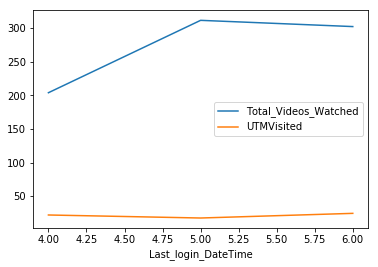

In [53]:
plt.figure(figsize=(15,7))
hyper_active_user.groupby(hyper_active_user['Last_login_DateTime'].dt.month)[['Total_Videos_Watched','UTMVisited']].mean().plot()

Text(0.5,1,'Day wise wideo watched')

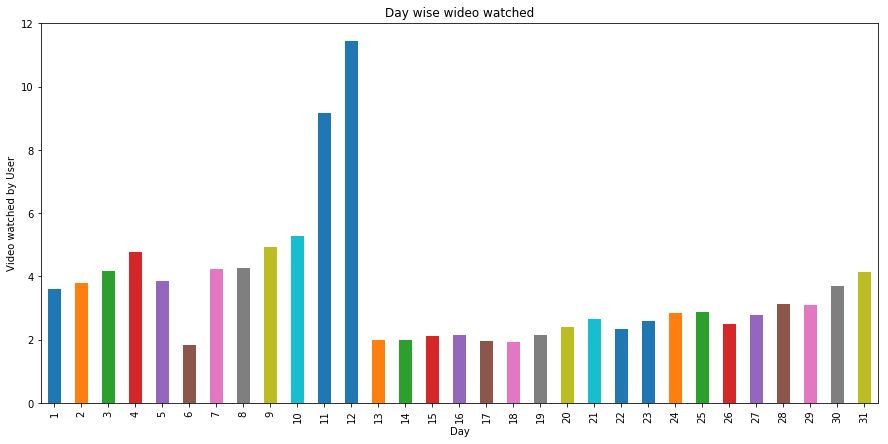

In [54]:
plt.figure(figsize=(15,7))
master_data.groupby(master_data['Last_login_DateTime'].dt.day) ['Total_Videos_Watched'].mean().plot.bar()
plt.xlabel('Day')
plt.ylabel('Video watched by User')
plt.title('Day wise wideo watched')